# Análise Exploratória de Dados

## Dataset: Avistamento de OVNIs pelo Mundo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## 1. Total de registros e colunas da base de dados

In [3]:
# data source: https://www.kaggle.com/datasets/rishidamarla/ufo-sightings-approx-100000

df = pd.read_csv('nuforc_reports.csv')
df.shape

(141088, 12)

## 2. Primeiros registros da base de dados

In [4]:
df.head(5)

,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
0,01/2015,1/25/15 21:00,1/26/15,Jacksonville,FL,USA,Light,3 hours,No,https://nuforc.org/webreports/reports/116/S116...,"While laying in bed, I looked out of the windo...",On 01/25/15 at 9pm while laying in bed I looke...
1,05/2018,5/1/18 02:15,5/4/18,Henderson,NV,USA,Light,40 minutes,No,https://nuforc.org/webreports/reports/139/S139...,4 brilliant lights were at first in a diamond ...,4 brilliant lights were at first in a diamond ...
2,05/2018,5/1/18 05:30,8/10/18,Asheville,NC,USA,Diamond,~30 minutes,No,https://nuforc.org/webreports/reports/142/S142...,For weeks a friend of mine observed many small...,For weeks a friend of mine observed many small...
3,05/2018,5/3/18 08:30,5/10/18,Sebastopol,CA,USA,Other,2-3 minutes,No,https://nuforc.org/webreports/reports/139/S139...,"High-altitude, or sub-orbital, UFO, followed b...","High-altitude, or sub-orbital, UFO, followed b..."
4,05/2018,5/1/18 20:00,12/1/19,Apache Junction,AZ,USA,Flash,30-90 minutes,No,https://nuforc.org/webreports/reports/150/S150...,My son had just gotten a telescope for a birth...,My son had just gotten a telescope for a birth...


## 3. Colunas da base de dados

In [5]:
df.columns

Index(['Date_Table', 'Date', 'Posted', 'City', 'State', 'Country', 'Shape',
       'Duration', 'Image', 'Link', 'Summary', 'Text'],
      dtype='object')

# 4. Tipo dos dados das colunas

In [7]:
df.dtypes

Date_Table    object
Date          object
Posted        object
City          object
State         object
Country       object
Shape         object
Duration      object
Image         object
Link          object
Summary       object
Text          object
dtype: object

## 5. Adicionando Colunas de Mês (Month_Date) e Ano (Year_Date)

In [13]:
months = [] 
years = []
for i in df['Date_Table']:
    aux = i.split("/")
    try:
        year = int(aux[1])
        months.append(aux[0])
        years.append(aux[1])
    except:
        months.append(None)
        years.append(None)

df['Month_Date'] = months
df['Year_Date'] = years
df.head(5)

,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text,Month_Date,Year_Date
0,01/2015,1/25/15 21:00,1/26/15,Jacksonville,FL,USA,Light,3 hours,No,https://nuforc.org/webreports/reports/116/S116...,"While laying in bed, I looked out of the windo...",On 01/25/15 at 9pm while laying in bed I looke...,01,2015
1,05/2018,5/1/18 02:15,5/4/18,Henderson,NV,USA,Light,40 minutes,No,https://nuforc.org/webreports/reports/139/S139...,4 brilliant lights were at first in a diamond ...,4 brilliant lights were at first in a diamond ...,05,2018
2,05/2018,5/1/18 05:30,8/10/18,Asheville,NC,USA,Diamond,~30 minutes,No,https://nuforc.org/webreports/reports/142/S142...,For weeks a friend of mine observed many small...,For weeks a friend of mine observed many small...,05,2018
3,05/2018,5/3/18 08:30,5/10/18,Sebastopol,CA,USA,Other,2-3 minutes,No,https://nuforc.org/webreports/reports/139/S139...,"High-altitude, or sub-orbital, UFO, followed b...","High-altitude, or sub-orbital, UFO, followed b...",05,2018
4,05/2018,5/1/18 20:00,12/1/19,Apache Junction,AZ,USA,Flash,30-90 minutes,No,https://nuforc.org/webreports/reports/150/S150...,My son had just gotten a telescope for a birth...,My son had just gotten a telescope for a birth...,05,2018


## 5. Adicionando coluna de Horário (Time)

In [14]:
times = [] 
for i in df['Date']:
    aux = i.split(' ')
    if len(aux) != 2: times.append(None)
    else: times.append(aux[1])

df['Time'] = times
df.head(5)

,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text,Month_Date,Year_Date,Time
0,01/2015,1/25/15 21:00,1/26/15,Jacksonville,FL,USA,Light,3 hours,No,https://nuforc.org/webreports/reports/116/S116...,"While laying in bed, I looked out of the windo...",On 01/25/15 at 9pm while laying in bed I looke...,01,2015,21:00
1,05/2018,5/1/18 02:15,5/4/18,Henderson,NV,USA,Light,40 minutes,No,https://nuforc.org/webreports/reports/139/S139...,4 brilliant lights were at first in a diamond ...,4 brilliant lights were at first in a diamond ...,05,2018,02:15
2,05/2018,5/1/18 05:30,8/10/18,Asheville,NC,USA,Diamond,~30 minutes,No,https://nuforc.org/webreports/reports/142/S142...,For weeks a friend of mine observed many small...,For weeks a friend of mine observed many small...,05,2018,05:30
3,05/2018,5/3/18 08:30,5/10/18,Sebastopol,CA,USA,Other,2-3 minutes,No,https://nuforc.org/webreports/reports/139/S139...,"High-altitude, or sub-orbital, UFO, followed b...","High-altitude, or sub-orbital, UFO, followed b...",05,2018,08:30
4,05/2018,5/1/18 20:00,12/1/19,Apache Junction,AZ,USA,Flash,30-90 minutes,No,https://nuforc.org/webreports/reports/150/S150...,My son had just gotten a telescope for a birth...,My son had just gotten a telescope for a birth...,05,2018,20:00


## 7. Colunas com Valores Nulos

In [60]:
df.isna().sum()

Date_Table       0
Date             0
Posted           0
City             3
State           26
Country          2
Shape            0
Duration        20
Image            0
Link             0
Summary          0
Text            34
Month_Date     376
Year_Date      376
Time          1978
dtype: int64

## 8. Removendo registros com 'Country' nulo

In [15]:
df = df.dropna(subset=['Country'])
df.isna().sum()

Date_Table       0
Date             0
Posted           0
City             3
State           26
Country          0
Shape            0
Duration        20
Image            0
Link             0
Summary          0
Text            34
Month_Date     376
Year_Date      376
Time          1978
dtype: int64

## 9. Removendo registros com 'Year_Date' nulo

In [16]:
df = df.dropna(subset=['Year_Date'])
df.isna().sum()

Date_Table       0
Date             0
Posted           0
City             3
State           26
Country          0
Shape            0
Duration        20
Image            0
Link             0
Summary          0
Text            34
Month_Date       0
Year_Date        0
Time          1735
dtype: int64

## 10. Avistamentos por ano (últimos 40 anos)

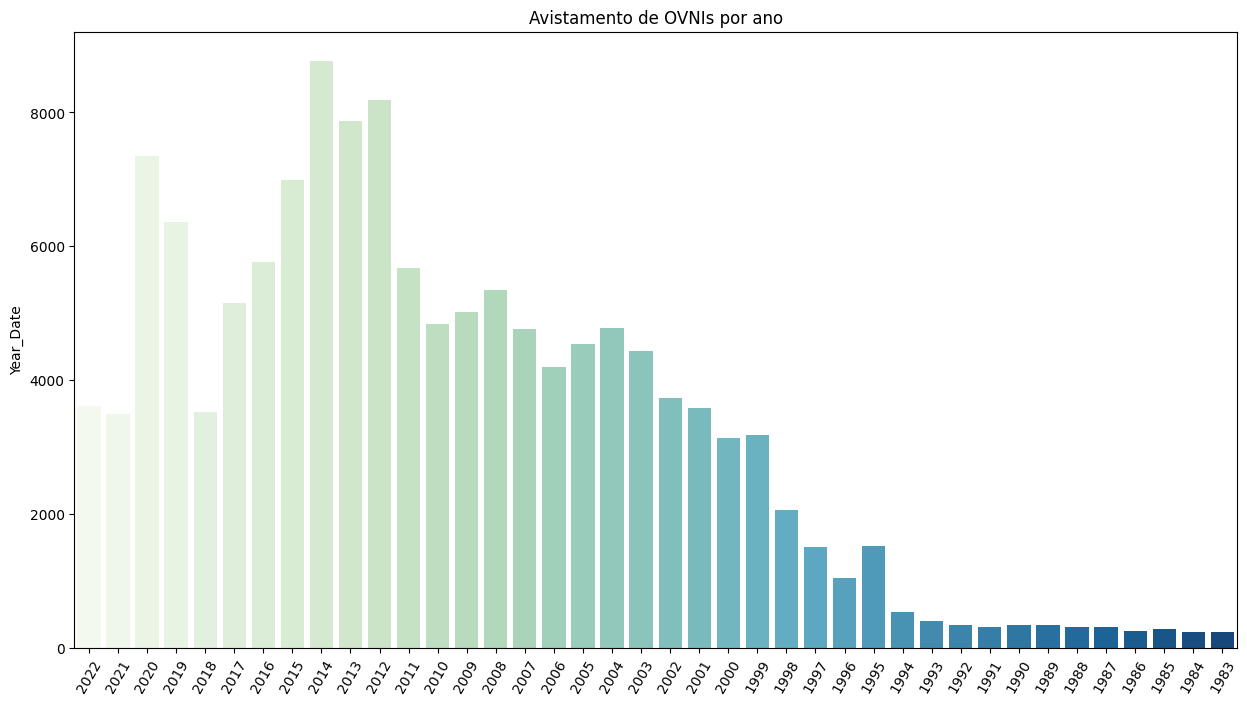

In [27]:
ufo_yr = df['Year_Date']  # series with the year exclusively

## Setando os eixos
years_data = ufo_yr.value_counts().sort_index(ascending=False)
years_index = years_data.index  # x ticks

## Criando Bar Plot ##
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('Avistamento de OVNIs por ano')

years_plot = sns.barplot(x=years_index[:40],y=years_data[:40], palette = "GnBu")

## 11. 5 países com mais avistamentos

Text(0, 0.5, 'Countagem de Avistamentos')

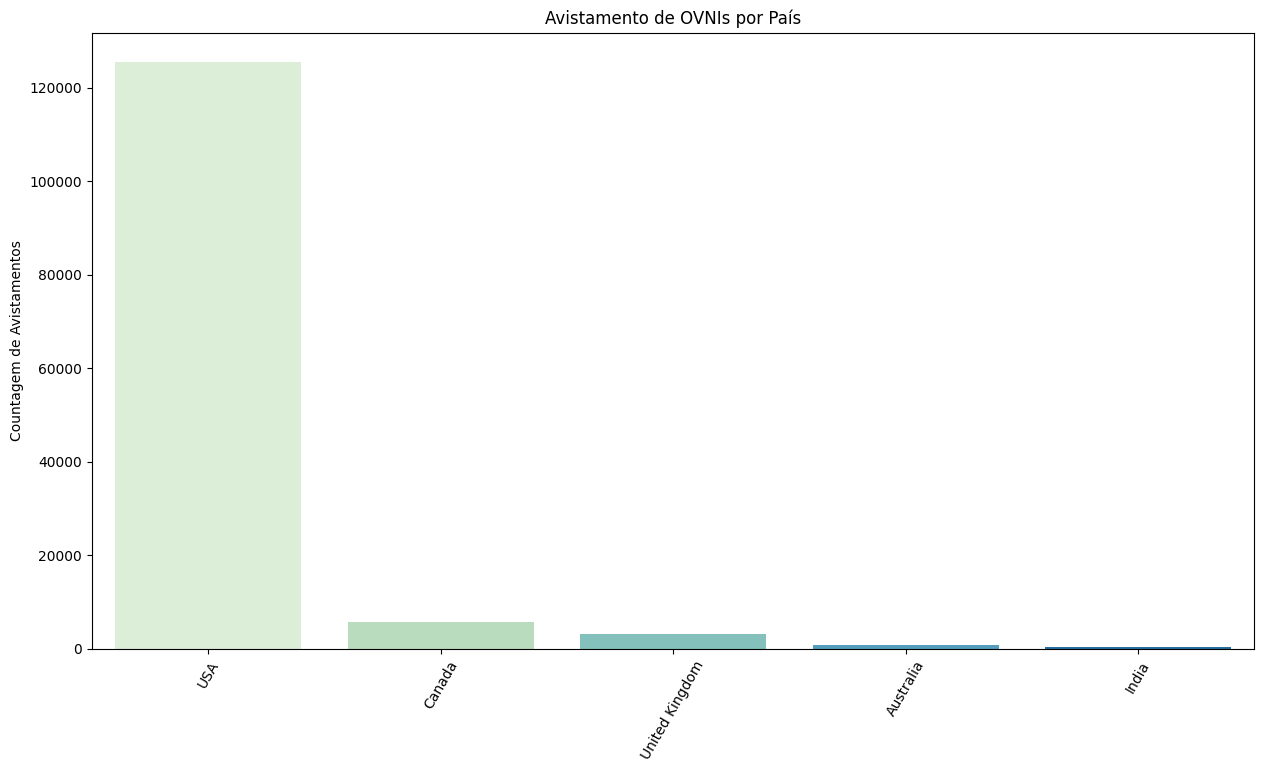

In [28]:
ufo_country = df['Country']  # series with the year exclusively

## Setando os eixos ##
country_data = ufo_country.value_counts()
country_index = country_data.index  # x ticks

## Criando Bar Plot ##
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('Avistamento de OVNIs por País')

country_plot = sns.barplot(x=country_index[:5],y=country_data[:5], palette = "GnBu")
plt.ylabel('Countagem de Avistamentos')

## 12. Removendo registros sem dado de "State"

In [29]:
df['State'] = df['State'].replace(['Unknown'], None)
df = df.dropna(subset=['State'])
df.isna().sum()

Date_Table       0
Date             0
Posted           0
City             2
State            0
Country          0
Shape            0
Duration        18
Image            0
Link             0
Summary          0
Text            34
Month_Date       0
Year_Date        0
Time          1412
dtype: int64

## 13. Estados com mais avistamentos

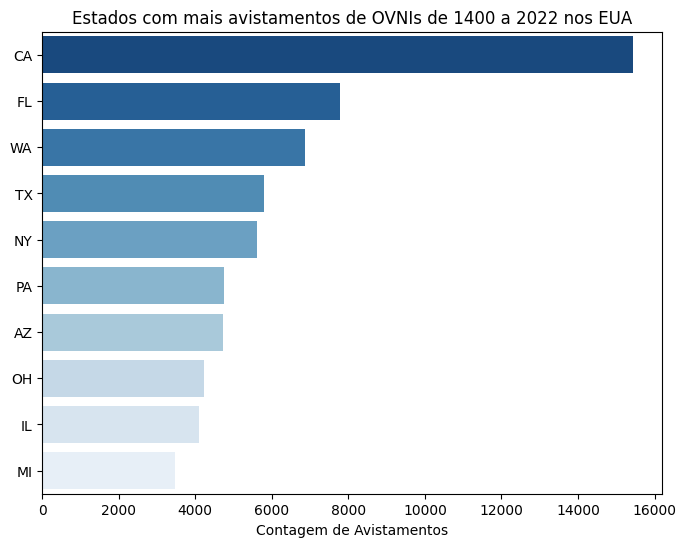

In [31]:
plt.figure(figsize=(8,6))
top_state = df['State'].value_counts().nlargest(10)

sns.barplot(x=top_state, y=top_state.index, palette='Blues_r')
plt.xlabel('Contagem de Avistamentos')
plt.title('Estados com mais avistamentos de OVNIs de {} a {} nos EUA'.format(df['Year_Date'].min(), df['Year_Date'].max()));

## 14. Cidades com mais avistamentos

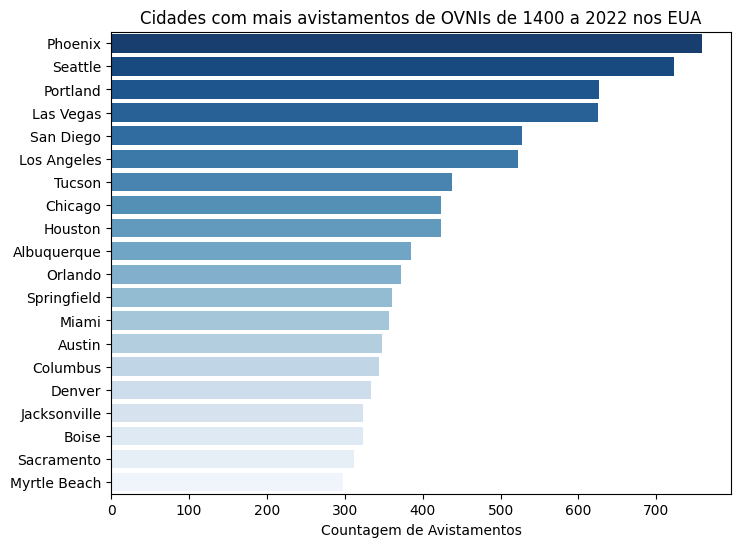

In [32]:
plt.figure(figsize=(8,6))
top_city = df['City'].value_counts().nlargest(20)


sns.barplot(x=top_city, y=top_city.index, palette='Blues_r')
plt.xlabel('Countagem de Avistamentos')
plt.title('Cidades com mais avistamentos de OVNIs de {} a {} nos EUA'.format(df['Year_Date'].min(), df['Year_Date'].max()));

## 15. Percentual de avistamentos que possuem imagem

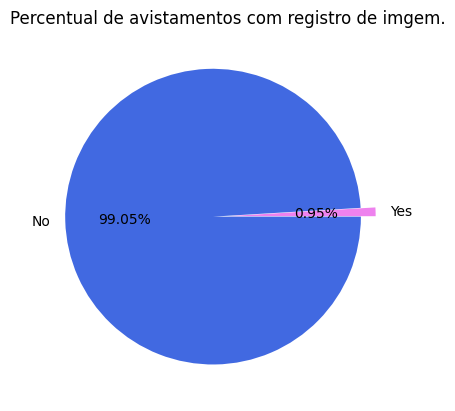

In [33]:
colors = ['violet', 'royalblue']
explode = (0, 0.1)

keys = ['Yes', 'No']
# plotting data on chart
plt.pie(df.groupby('Image').size().sort_values(), labels=keys, colors=colors,
        explode=explode, autopct='%.2f%%')

plt.title('Percentual de avistamentos com registro de imgem.');
# displaying chart
plt.show()


## 16. Número de avistamentos por formato

In [70]:
df['Shape'] = df.Shape.str.capitalize()
df.loc[df['Shape'] == 'Other', 'Shape'] = 'Unknown'


pd.DataFrame(df.Shape.value_counts(ascending=False))

,Shape
Light,26685
Unknown,23681
Circle,13873
Triangle,11815
Fireball,9136
Sphere,8541
Disk,7561
Oval,5633
Formation,4367
Changing,3369


## 17. Avistamento por formato

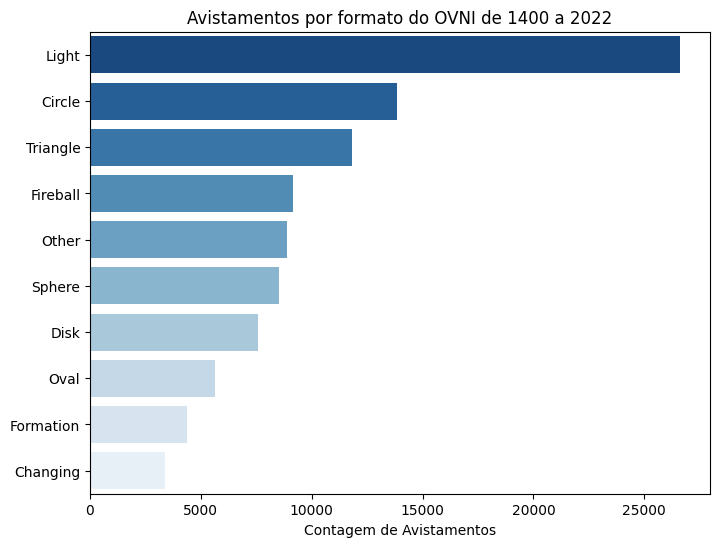

In [34]:
plt.figure(figsize=(8,6))
top_shape = df.loc[~df.Shape.isin(['Unknown'])].Shape.value_counts().nlargest(10)


sns.barplot(x=top_shape, y=top_shape.index, palette='Blues_r')
plt.xlabel('Contagem de Avistamentos')
plt.title('Avistamentos por formato do OVNI de {} a {}'.format(df['Year_Date'].min(), df['Year_Date'].max()));

## 18. Variação histórica de avistamentos

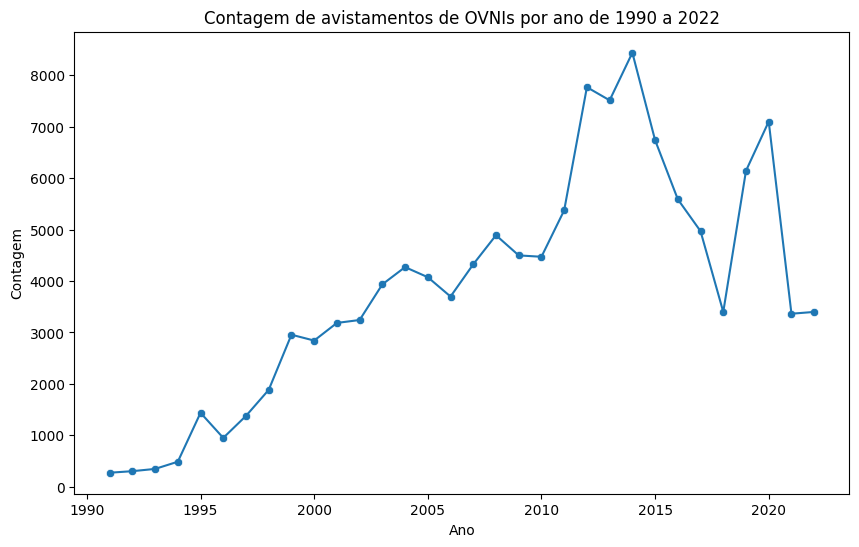

In [35]:
plt.figure(figsize=(10, 6))

# start year used in the plot 
year_figure = 1990

# using apply method
df[['Year_Date']] = df[['Year_Date']].apply(pd.to_numeric)

sightings_count = df.loc[df['Year_Date'] > year_figure].groupby('Year_Date').count().reset_index()

fig1 = sns.lineplot(x = "Year_Date", y = "Duration", data = sightings_count)
sns.scatterplot(x = "Year_Date", y = "Duration", data = sightings_count)

fig1.set_xlabel('Ano')
fig1.set_ylabel('Contagem')
fig1.set_title('Contagem de avistamentos de OVNIs por ano de {} a {}'.format(year_figure, df['Year_Date'].max()))

plt.show()